# Twitter Trend Anslysis
data src: "https://www.kaggle.com/arkhoshghalb/twitter-sentiment-analysis-hatred-speech"

dataset brief desc: 
Dataset contains four cities [Mumbai, Delhi, Chennai, Kolkata] twitter datasets of India.

In this project only two cities viz. Kolkata and Chennai, trend is analyzed.
    

In [15]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import chain
from wordcloud import WordCloud 
from nltk.probability import FreqDist

In [4]:
kolkata_path = 'datasets/combined_kolkata.csv'
chennai_path = "datasets/combined_chennai.csv"

kolkata_df = pd.read_csv(kolkata_path)
chennai_df = pd.read_csv(chennai_path)

# Kolkata

In [5]:
kolkata_df.head()

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/lokshahi/status/1371862655...,2021-03-16 16:35:19+00:00,#CoronaVaccine\n#Update\n#chhattisgarh\n*Achie...,#CoronaVaccine\n#Update\n#chhattisgarh\n*Achie...,1371862655393144833,"{'username': 'lokshahi', 'id': 75516094, 'disp...",0,1,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 81.534775, 'latitude': 20.939239}","{'fullName': 'Raipur, India', 'name': 'Raipur'...","['CoronaVaccine', 'Update', 'chhattisgarh']",NaN
1,1,https://twitter.com/V_with_RG/status/137181920...,2021-03-16 13:42:40+00:00,"@StayingReal0511 More alarmingly, over 12,000 ...","@StayingReal0511 More alarmingly, over 12,000 ...",1371819206233104387,"{'username': 'V_with_RG', 'id': 117822932, 'di...",0,1,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,1.371799e+18,"{'username': 'StayingReal0511', 'id': 10985446...","[{'username': 'StayingReal0511', 'id': 1098544...","{'longitude': 80.125067, 'latitude': 26.177178}","{'fullName': 'Kanpur, India', 'name': 'Kanpur'...",NaN,NaN
2,2,https://twitter.com/V_with_RG/status/137181916...,2021-03-16 13:42:30+00:00,"@StayingReal0511 More alarmingly, over 12,000 ...","@StayingReal0511 More alarmingly, over 12,000 ...",1371819165070225416,"{'username': 'V_with_RG', 'id': 117822932, 'di...",1,0,1,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,1.371803e+18,"{'username': 'StayingReal0511', 'id': 10985446...","[{'username': 'StayingReal0511', 'id': 1098544...","{'longitude': 80.125067, 'latitude': 26.177178}","{'fullName': 'Kanpur, India', 'name': 'Kanpur'...",NaN,NaN
3,3,https://twitter.com/rahulsaraph/status/1371770...,2021-03-16 10:29:53+00:00,COVID-19 SECOND DOSE https://t.co/KfesiNqtsL,COVID-19 SECOND DOSE https://t.co/KfesiNqtsL,1371770692027346944,"{'username': 'rahulsaraph', 'id': 2592868747, ...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 81.391502, 'latitude': 17.810452}","{'fullName': 'Orissa, India', 'name': 'Orissa'...",NaN,NaN
4,4,https://twitter.com/iMuBiNi/status/13717362783...,2021-03-16 08:13:09+00:00,Our first love should never ever become succes...,Our first love should never ever become succes...,1371736278387990529,"{'username': 'iMuBiNi', 'id': 1605436278, 'dis...",0,4,4,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,"[{'username': 'dulQuer', 'id': 114407932, 'dis...","{'longitude': 89.3488235, 'latitude': 22.8894691}","{'fullName': 'Dhaka, Bangladesh', 'name': 'Dha...","['CIA', 'ComraswInAmerica', 'malaylaamFilm', '...",NaN


In [6]:
kolkata_df.dtypes

Unnamed: 0            int64
url                  object
date                 object
content              object
renderedContent      object
id                    int64
user                 object
replyCount            int64
retweetCount          int64
likeCount             int64
quoteCount            int64
conversationId        int64
lang                 object
source               object
sourceUrl            object
sourceLabel          object
outlinks             object
tcooutlinks          object
media                object
retweetedTweet      float64
quotedTweet          object
inReplyToTweetId    float64
inReplyToUser        object
mentionedUsers       object
coordinates          object
place                object
hashtags             object
cashtags            float64
dtype: object

In [19]:
kolkata_df.shape

(1593, 28)

**Observation:**

* There are 28 features among them feature 'hashtags' is our concern of analysis.

## Creating the new dataframe of 'hashtags' feature.

In [7]:
hashtags = kolkata_df['hashtags'].copy()

## Data Cleaning

* most of the hashtags are null so we that rows and reset our index value.

In [8]:
hashtags.isnull().sum()
new_hashtags = kolkata_df['hashtags'].dropna(axis=0, how="any", inplace=False)

In [9]:
hashtag = new_hashtags.reset_index(drop=True)

## Tokenization
### hashtags : ['CoronaVaccine', 'Update', 'chhattisgarh']

In [13]:
# data cleaning
def clean_data(text):
    return text.replace("[", "").replace("]", "") \
            .replace("'", "").split(", ")

has_value = []
for h in hashtag:
    has = clean_data(h)
    has_value.append(has)

# accumulating in a single list
final_data = list(chain(*has_value))

## Data Visualization with wordcloud

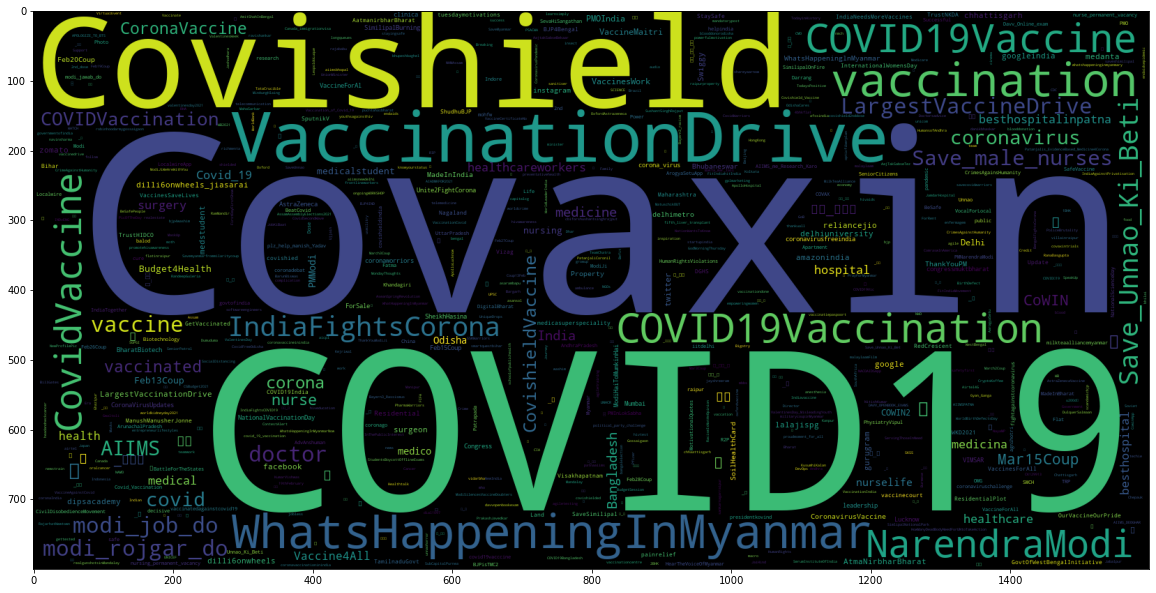

In [25]:
# creating wordcloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(final_data))
plt.imshow(wc)
plt.show()

Most Common 20 words
--------------------
[('COVID19', 91), ('Covaxin', 79), ('VaccinationDrive', 60), ('WhatsHappeningInMyanmar', 55), ('Covishield', 51), ('vaccination', 50), ('COVID19Vaccination', 49), ('COVID19Vaccine', 44), ('NarendraModi', 44), ('IndiaFightsCorona', 39), ('Save_Unnao_Ki_Beti', 38), ('LargestVaccineDrive', 35), ('modi_job_do', 33), ('modi_rojgar_do', 33), ('CovidVaccine', 30), ('COVAXIN', 29), ('Save_male_nurses', 29), ('vaccine', 28), ('coronavirus', 24), ('CovishieldVaccine', 22)]

Counts of the most common words in graph


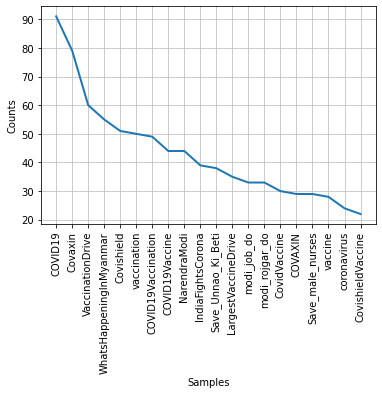

In [18]:
# frequency distribution
fdist = FreqDist(final_data)

# printing most common 20 words
print("Most Common 20 words")
print("--------------------")
print(fdist.most_common(20))

print()

print("Counts of the most common words in graph")
fdist.plot(20)
plt.show()

# Chennai

In [20]:
chennai_df.head()

,Unnamed: 0,url,date,content,renderedContent,id,user,replyCount,retweetCount,likeCount,...,media,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags
0,0,https://twitter.com/mvapselvam/status/13710284...,2021-03-14 09:20:21+00:00,"@ANI Dear doctor,\nSerum institute of India &a...","@ANI Dear doctor,\nSerum institute of India &a...",1371028415831142402,"{'username': 'mvapselvam', 'id': 9093224250530...",0,0,0,...,NaN,NaN,NaN,1.370991e+18,"{'username': 'ANI', 'id': 355989081, 'displayn...","[{'username': 'ANI', 'id': 355989081, 'display...","{'longitude': 79.7793203, 'latitude': 14.1503952}","{'fullName': 'Nellore, India', 'name': 'Nellor...",NaN,NaN
1,1,https://twitter.com/SAMEERDENT/status/13699322...,2021-03-11 08:44:23+00:00,"Thanks to the scientists, researchers from Uni...","Thanks to the scientists, researchers from Uni...",1369932200750116867,"{'username': 'SAMEERDENT', 'id': 337231039, 'd...",0,0,0,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 76.215727, 'latitude': 10.968177}","{'fullName': 'Perinthalmanna, India', 'name': ...","['vaccinecovid19', 'astrazenecaoxford']",NaN
2,2,https://twitter.com/atanu_ch1/status/136725055...,2021-03-03 23:08:29+00:00,Was surprised to see the vaccine being adminis...,Was surprised to see the vaccine being adminis...,1367250557182767107,"{'username': 'atanu_ch1', 'id': 71471377149163...",1,1,1,...,NaN,NaN,NaN,1.367251e+18,"{'username': 'atanu_ch1', 'id': 71471377149163...",NaN,"{'longitude': 77.3305776, 'latitude': 12.731936}","{'fullName': 'Bengaluru South, India', 'name':...",NaN,NaN
3,3,https://twitter.com/DrYasminAHaque/status/1364...,2021-02-24 13:52:49+00:00,Today I visited the Serum Institute of India t...,Today I visited the Serum Institute of India t...,1364574002572746762,"{'username': 'DrYasminAHaque', 'id': 885762201...",10,64,432,...,[{'previewUrl': 'https://pbs.twimg.com/media/E...,NaN,NaN,NaN,NaN,NaN,"{'longitude': 73.8031065, 'latitude': 18.4571648}","{'fullName': 'Pune, India', 'name': 'Pune', 't...",NaN,NaN
4,4,https://twitter.com/macharajarao/status/136228...,2021-02-18 05:58:45+00:00,@Satyanewshi Serum Institute of India should f...,@Satyanewshi Serum Institute of India should f...,1362280374282252292,"{'username': 'macharajarao', 'id': 272503721, ...",2,0,3,...,NaN,NaN,NaN,NaN,NaN,NaN,"{'longitude': 77.3305776, 'latitude': 12.731936}","{'fullName': 'Bengaluru South, India', 'name':...",NaN,NaN


In [21]:
chennai_df.shape

(1424, 28)

## Creating the new dataframe of 'hashtags' feature.

In [22]:
hashtag = chennai_df['hashtags'].copy()

## Data Cleaning

most of the hashtags are null so we that rows and reset our index value.

In [23]:
hashtag.isnull().sum()
new_hashtag = chennai_df['hashtags'].dropna(axis=0, how="any", inplace=False)
hash_tag = new_hashtag.reset_index(drop=True)

## Tokenization

In [29]:
# data cleaning
def clean_data(text):
    return text.replace("[", "").replace("]", "") \
            .replace("'", "").split(", ")

hasValue = []
for h in hash_tag:
    has = clean_data(h)
    hasValue.append(has)

# accumulating in a single list
finalData = list(chain(*hasValue))

## Data Visualization

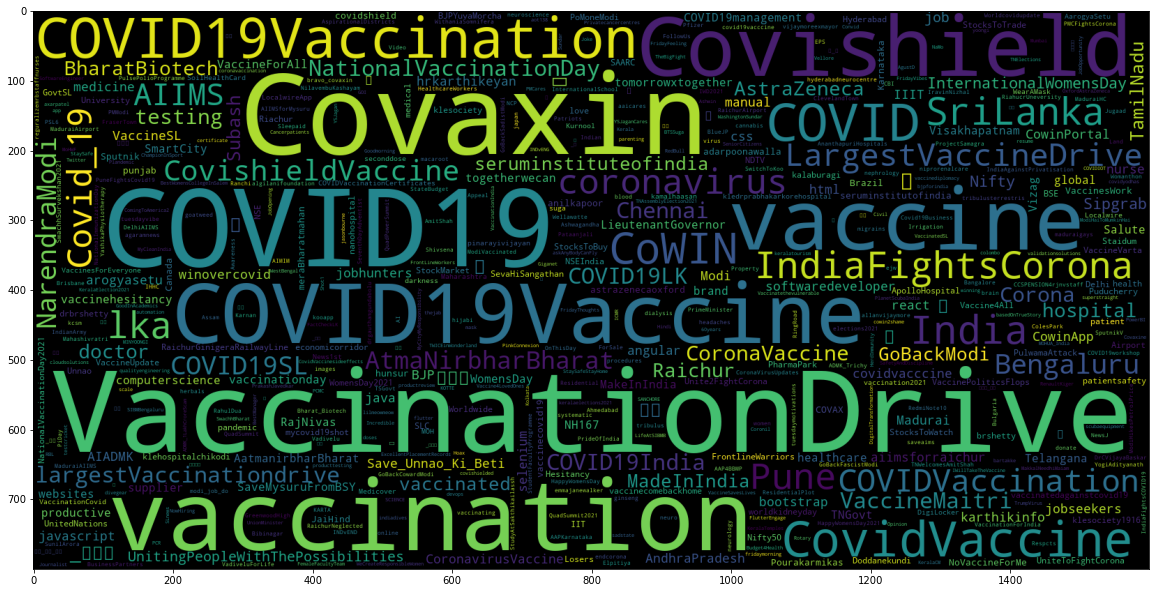

In [33]:
# creating wordcloud
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(finalData))
plt.imshow(wc)
plt.show()

Most Common 20 words
--------------------
[('VaccinationDrive', 96), ('Covaxin', 81), ('COVID19', 78), ('vaccination', 63), ('COVID19Vaccination', 50), ('COVID19Vaccine', 49), ('vaccine', 44), ('Covishield', 42), ('CovidVaccine', 28), ('COVID', 22), ('CoWIN', 20), ('IndiaFightsCorona', 20), ('India', 20), ('SriLanka', 19), ('Covid', 16), ('Covid_19', 15), ('COVIDVaccination', 15), ('coronavirus', 14), ('LargestVaccineDrive', 13), ('Pune', 13)]

Counts of the most common words in graph


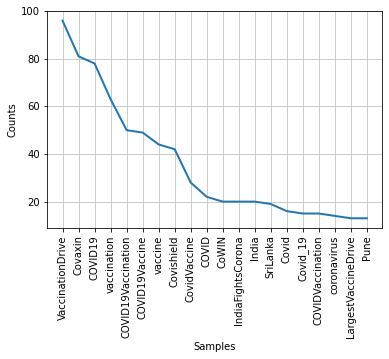

In [31]:
# frequency distribution
fdist = FreqDist(finalData)

# printing most common 20 words
print("Most Common 20 words")
print("--------------------")
print(fdist.most_common(20))

print()

print("Counts of the most common words in graph")
fdist.plot(20)
plt.show()

## Conclusion
* Both cities are in Covid pandemic, 
* Vaccination drive
* Covaxin, Covishield